In [1]:
import torch
import numpy as np

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
import matplotlib.pyplot as plt

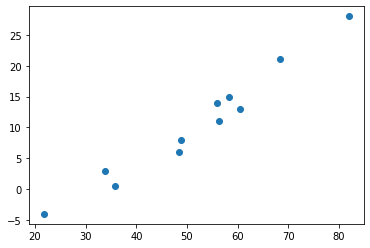

In [4]:
plt.plot(t_u,t_c, 'o')

In [5]:
def model(t_u, w, b):
    return w*t_u + b

In [6]:
def loss_fn(t_p, t_c):
    return ((t_p-t_c)**2).mean()

In [7]:
w = torch.ones(())
b = torch.zeros(())

In [8]:
t_p = model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [9]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [10]:
delta = 0.1

In [13]:
loss_rate_of_change_w = (loss_fn(model(t_u,w+delta,b),t_c)-loss_fn(model(t_u,w-delta,b),t_c))/(2.0*delta)

In [14]:
learning_rate = 1e-2    
w = w-learning_rate*loss_rate_of_change_w

In [15]:
loss_rate_of_change_b = (loss_fn(model(t_u,w,b+delta),t_c)-loss_fn(model(t_u,w,b-delta),t_c))/(2.0*delta)
b = b-learning_rate*loss_rate_of_change_b

In [17]:
t_p.shape

torch.Size([11])

In [18]:
def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c)/t_p.size(0)


In [19]:
def dmodel_dw(t_u,w,b):
    return t_u

def dmodel_db(t_u,w,b):
    return 1.0

In [24]:
def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp*dmodel_dw(t_u,w,b)
    dloss_db = dloss_dtp*dmodel_db(t_u,w,b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [26]:
def training_loop(n_epochs,learning_rate,params,t_u,t_c):
    for epoch in range(1, n_epochs+1):
        w,b = params
        t_p = model(t_u,w,b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u,t_c,t_p,w,b)

        params = params - learning_rate*grad
        print('Epoch: {}, Loss: {:.2f}, Params: {}'.format(epoch, loss.item(), params))
    return params

In [29]:
training_loop(100,1e-4,torch.tensor([1.0,0.0]),t_u,t_c)

Epoch: 1, Loss: 1763.88, Params: tensor([ 0.5483, -0.0083])
Epoch: 2, Loss: 323.09, Params: tensor([ 0.3623, -0.0118])
Epoch: 3, Loss: 78.93, Params: tensor([ 0.2858, -0.0135])
Epoch: 4, Loss: 37.55, Params: tensor([ 0.2543, -0.0143])
Epoch: 5, Loss: 30.54, Params: tensor([ 0.2413, -0.0149])
Epoch: 6, Loss: 29.35, Params: tensor([ 0.2360, -0.0153])
Epoch: 7, Loss: 29.15, Params: tensor([ 0.2338, -0.0156])
Epoch: 8, Loss: 29.11, Params: tensor([ 0.2329, -0.0159])
Epoch: 9, Loss: 29.11, Params: tensor([ 0.2325, -0.0162])
Epoch: 10, Loss: 29.11, Params: tensor([ 0.2324, -0.0166])
Epoch: 11, Loss: 29.10, Params: tensor([ 0.2323, -0.0169])
Epoch: 12, Loss: 29.10, Params: tensor([ 0.2323, -0.0172])
Epoch: 13, Loss: 29.10, Params: tensor([ 0.2323, -0.0175])
Epoch: 14, Loss: 29.10, Params: tensor([ 0.2323, -0.0178])
Epoch: 15, Loss: 29.10, Params: tensor([ 0.2323, -0.0181])
Epoch: 16, Loss: 29.10, Params: tensor([ 0.2323, -0.0184])
Epoch: 17, Loss: 29.10, Params: tensor([ 0.2323, -0.0187])
Epo

tensor([ 0.2327, -0.0438])

In [30]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [31]:
def model(t_u,w,b):
    return w*t_u+b
def loss_fn(t_p,t_c):
    return ((t_p-t_c)**2).mean()

In [32]:
params = torch.tensor([1.0,0.0],requires_grad=True)

In [34]:
params.grad is None

True

In [35]:
loss = loss_fn(model(t_u,*params),t_c)
loss.backward()

In [49]:
params.grad.zero_()

tensor([0., 0.])

In [50]:
loss = loss_fn(model(t_u,*params),t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [53]:
def training_loop(epochs, learning_rate,params,t_u,t_c):
    for epoch in range(epochs):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u,*params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate*params.grad
        if epoch%500==0:
            print('Epoch: {}, Loss: {:.2f}'.format(epoch, loss.item()))
    return params

In [54]:
training_loop(5000,1e-2, torch.tensor([1.0,0.0], requires_grad=True),t_u*0.1,t_c)

Epoch: 0, Loss: 80.36
Epoch: 500, Loss: 7.84
Epoch: 1000, Loss: 3.83
Epoch: 1500, Loss: 3.09
Epoch: 2000, Loss: 2.96
Epoch: 2500, Loss: 2.93
Epoch: 3000, Loss: 2.93
Epoch: 3500, Loss: 2.93
Epoch: 4000, Loss: 2.93
Epoch: 4500, Loss: 2.93


tensor([  5.3671, -17.3012], requires_grad=True)

In [55]:
import torch.optim as optim

In [56]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [57]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params],lr=learning_rate)

In [58]:
t_p = model(t_u,*params)
loss = loss_fn(t_p, t_c)
loss.backward()

In [59]:
optimizer.step()

In [60]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [62]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params],learning_rate)
t_p = model(t_u*0.1,*params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [67]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(n_epochs):
        t_p = model(t_u,*params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch%500==0:
            print('Epoch: {}, Loss: {:.2f}'.format(epoch, loss.item()))
    return params

In [70]:
params = torch.tensor([1.,0.],requires_grad=True)
learning_rate=1e-2
optimizer = optim.Adam([params],learning_rate)
training_loop(5000,optimizer,params,t_u,t_c)

Epoch: 0, Loss: 1763.88
Epoch: 500, Loss: 25.59
Epoch: 1000, Loss: 22.95
Epoch: 1500, Loss: 19.63
Epoch: 2000, Loss: 16.02
Epoch: 2500, Loss: 12.48
Epoch: 3000, Loss: 9.33
Epoch: 3500, Loss: 6.80
Epoch: 4000, Loss: 4.99
Epoch: 4500, Loss: 3.87


tensor([  0.5017, -15.3177], requires_grad=True)